In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

Vamos a leer el dataset, lo que sabemos: 
-Data recolectada de transacciones durante 2 dias 
-Contiene 31 columnas, de las coluales 3 son time, amount y class (clasificacion: 1 es fraude, 0 no es fraude)
y tambien 28 columnas v1, v2, ..., v28 las cuales suponemos que vienen de una aplicacion de PCA.

In [4]:
data = pd.read_csv("creditcard.csv")
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Existe un desbalanceo notorio, el ~99.82% son transacciones no fraudulentas, y el resto es fraude, esto es esperado dentro del análisis, por lo que se tomaran otras medidas para no sesgar los modelos

In [9]:
val_etiquetas = data["Class"].value_counts()
print(val_etiquetas)

Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
#Chequeo de datos nulos 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

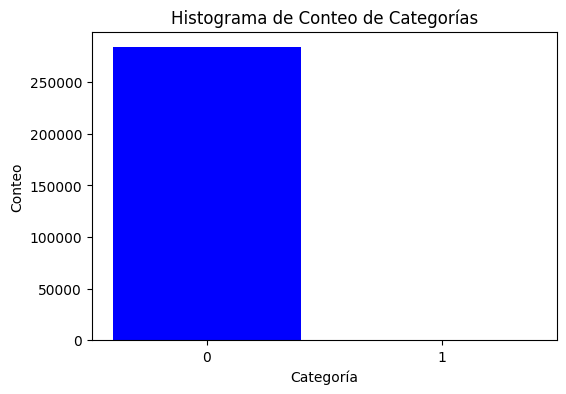

In [12]:
count_df = pd.DataFrame(val_etiquetas)
count_df.columns = ['Conteo']
plt.figure(figsize=(6, 4))
plt.bar(count_df.index, count_df['Conteo'], color=["blue","purple"])
plt.title('Histograma de Conteo de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.xticks(count_df.index, count_df.index)
plt.show()

Al ver la siguiente grafica podemos notar que la variable tiempo es importante para el análisis, se hace un calculo relativo de la hora ya que esta variable (Time) esta en segundos, pero podemos ver como la mayoria de transacciones fraudulentas ocurren en en la tarde noche

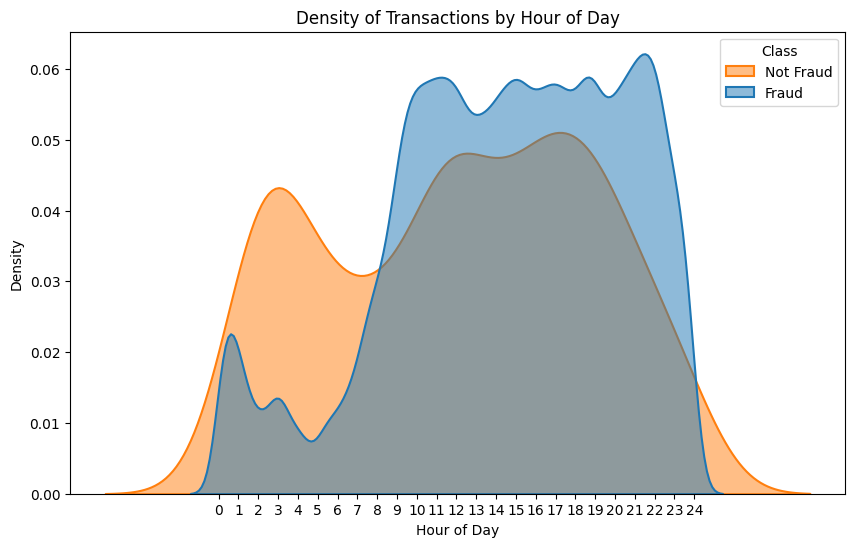

In [ ]:
data['hour_of_day'] = (data['Time'] % 86400) / 3600  #hora relativa

plt.figure(figsize=(10,6))

sns.kdeplot(
    data=data,
    x='hour_of_day',
    hue='Class',
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=1.5
)

plt.title("Density of Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Density")
plt.legend(title="Class", labels=["Not Fraud", "Fraud"])
plt.xticks(range(0,25))  
plt.show()

In [17]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))
#agrupacion por hora y clase 
aux = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(aux)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


Aqui hay una parte que es interesante para el análisis, observando los quartiles podemos ver que existen grandes diferencias en el q1 y q3, para el primer q las transacciones fraudulentas tienden a ser muy baja en comparacion a la no fraudulenta mientras que en el ultimo q vemos como hay una diferencia enorme, las transacciones fraudulentas tienen un valor muy alto compradado con los qs anteriores.
Esto se puede interpretar como: las acciones fraudulentas tienden  a empezar con montos pequeños tipo "prueba" en caso de no ser detectado sue vuelve a crear una trasaccion un poco mas alta y al estar seguro la siguiente transaccion sera mucho mas alta en el monto ya que es posible que sea mas facil la deteccion de fraude y por ende el bloqueo de paro de la cuenta

In [19]:

aux = data[['Amount','Class']].copy()
no_fraude = aux.loc[aux['Class'] == 0]['Amount']
fraude = aux.loc[aux['Class'] == 1]['Amount']
no_fraude.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraude.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Uso de modelos para la predicción de fraude.

In [24]:
etiquetas = data['Class']
caracteristicas = data.drop('Class', axis=1)
X_train, X_aux, y_train, y_aux = train_test_split(caracteristicas, etiquetas, test_size=0.4, random_state=42,shuffle = True, stratify=etiquetas)
X_test, X_val, y_test, y_val = train_test_split(caracteristicas, etiquetas, test_size=0.5, random_state=42,shuffle = True, stratify=etiquetas)

Knn

In [30]:
param_grid = {'n_neighbors': np.arange(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejor k:", grid.best_params_['n_neighbors'])
print("Mejor score:", grid.best_score_)

Mejor k: 3
Mejor score: 0.9984024244544729


In [31]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

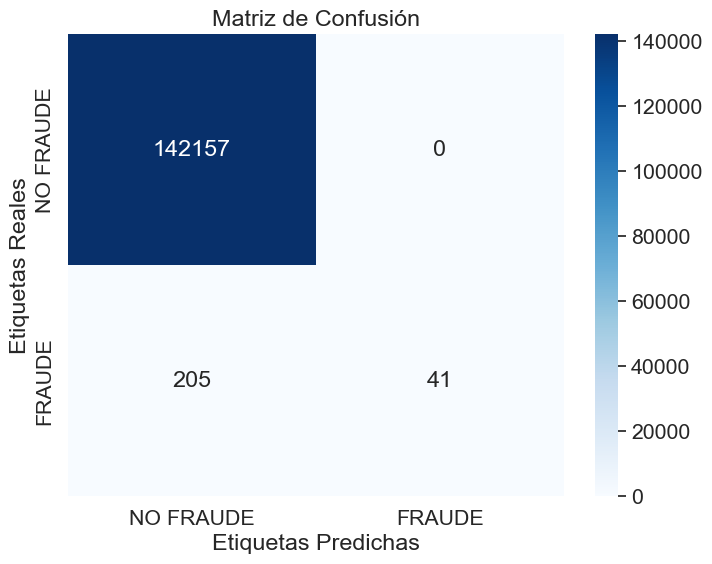

In [36]:
confusion = confusion_matrix(y_test, y_pred_knn)
class_names = ['NO FRAUDE', 'FRAUDE']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')
plt.show()

In [37]:

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_val, y_val)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 42

In [39]:
xgb_m = xgb.train(params, 
                dtrain, 
                1000, 
                watchlist, 
                early_stopping_rounds=100, 
                maximize=True, 
                verbose_eval=50)

[0]	train-auc:0.94904	valid-auc:0.93999


c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\callback.py:386: UserWarning: [22:12:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()


[50]	train-auc:0.98409	valid-auc:0.97406
[100]	train-auc:0.99074	valid-auc:0.97569
[150]	train-auc:0.99303	valid-auc:0.97672
[200]	train-auc:0.99482	valid-auc:0.97885
[250]	train-auc:0.99594	valid-auc:0.98057
[300]	train-auc:0.99678	valid-auc:0.98146
[350]	train-auc:0.99755	valid-auc:0.98133
[400]	train-auc:0.99809	valid-auc:0.98270
[450]	train-auc:0.99850	valid-auc:0.98364
[500]	train-auc:0.99880	valid-auc:0.98383
[550]	train-auc:0.99908	valid-auc:0.98376
[600]	train-auc:0.99919	valid-auc:0.98404
[650]	train-auc:0.99932	valid-auc:0.98400
[700]	train-auc:0.99942	valid-auc:0.98414
[750]	train-auc:0.99953	valid-auc:0.98419
[800]	train-auc:0.99959	valid-auc:0.98422
[818]	train-auc:0.99960	valid-auc:0.98423


In [45]:
y_pred_xgb = xgb_m.predict(dtest)
roc_auc = roc_auc_score(y_test,y_pred_xgb )
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb )
print(f"roc-auc {roc_auc}")

roc-auc 0.999542129962687


Random Forest

In [54]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, criterion='gini', verbose=False)
rf.fit(X_train, y_train)
y_scores = rf.predict_proba(X_test)[:, 1]

In [55]:
roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)
y_pred_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Matriz de Confusión')

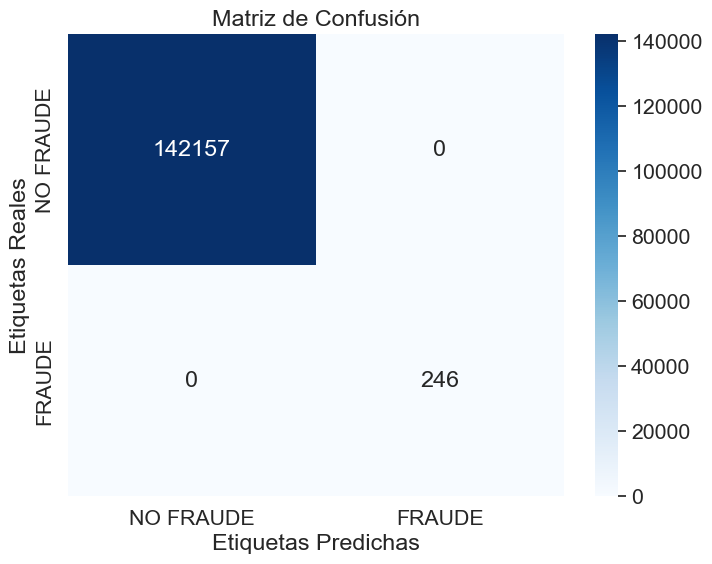

In [56]:
confusion = confusion_matrix(y_test, y_pred_rf)
class_names = ['NO FRAUDE', 'FRAUDE']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')

Al comparar KNN, XGBoost y Random Forest observamos que KNN requiere un dataset balanceado para ofrecer un buen desempeño, mientras que XGBoost y Random Forest muestran mayor capacidad para identificar patrones y variables clave, resultando en un rendimiento más sólido.

Para evaluar la calidad de los modelos, utilizamos la métrica ROC-AUC, que resulta crítica en escenarios de detección de fraude. En este contexto, es más costoso clasificar como “no fraude” una transacción que en realidad sí lo es, pues implica pérdidas monetarias directas para la institución. En contraste, un falso positivo (detectar fraude cuando no lo es) genera fricciones con el usuario, pero con un impacto financiero menor.

En conclusión, modelos como XGBoost y Random Forest no solo ofrecen mejor desempeño técnico, sino que también representan una alternativa más confiable para mitigar riesgos financieros en la detección de fraude.